In [2]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)
# Load datasets

X_train = pd.read_parquet(
    r"C:\Users\DELL\Downloads\ML Project\enivornmental_impact_of_aviation\Test-Train-Validation Data\X_train.parquet"
)
X_test = pd.read_parquet(
    r"C:\Users\DELL\Downloads\ML Project\enivornmental_impact_of_aviation\Test-Train-Validation Data\X_test.parquet"
)
X_val = pd.read_parquet(
    r"C:\Users\DELL\Downloads\ML Project\enivornmental_impact_of_aviation\Test-Train-Validation Data\X_val.parquet"
)
y_train = pd.read_parquet(
    r"C:\Users\DELL\Downloads\ML Project\enivornmental_impact_of_aviation\Test-Train-Validation Data\y_train.parquet"
).squeeze()
y_test = pd.read_parquet(
    r"C:\Users\DELL\Downloads\ML Project\enivornmental_impact_of_aviation\Test-Train-Validation Data\y_test.parquet"
).squeeze()
y_val = pd.read_parquet(
    r"C:\Users\DELL\Downloads\ML Project\enivornmental_impact_of_aviation\Test-Train-Validation Data\y_val.parquet"
).squeeze()

### Standarize the Features

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Fit PCA

In [4]:
from sklearn.decomposition import PCA

# 95% explained variance
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Inspect explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", pca.explained_variance_ratio_.sum())

Explained Variance Ratio: [0.01303454 0.0103396  0.00780379 0.00725172 0.00644272 0.00402491
 0.0038833  0.00383936 0.00380847 0.00375247 0.00373883 0.00365642
 0.00362426 0.00355463 0.00354672 0.00352893 0.00351978 0.00349797
 0.0034835  0.00346639 0.00342471 0.00333039 0.00331692 0.00329585
 0.00328181 0.00326702 0.00325185 0.00323223 0.0032161  0.00320172
 0.00319473 0.00318992 0.00317064 0.00313853 0.00312015 0.00310359
 0.00306686 0.0030556  0.00305019 0.00304516 0.00300381 0.00298468
 0.00297543 0.00295735 0.00294732 0.0029095  0.00290584 0.00289904
 0.00287331 0.00286568 0.0028644  0.00285096 0.00283931 0.00282439
 0.00281512 0.00279991 0.00279603 0.00276026 0.00275356 0.00273779
 0.00272564 0.0027069  0.00270233 0.00269947 0.00269374 0.00268978
 0.00268924 0.00267903 0.00267087 0.0026672  0.00264225 0.00262542
 0.00262137 0.00260574 0.0025883  0.00258409 0.00257575 0.0025622
 0.00255662 0.00254946 0.00253661 0.00251922 0.00251533 0.0025094
 0.00250536 0.00250197 0.00249332 0.00

### Visualizations

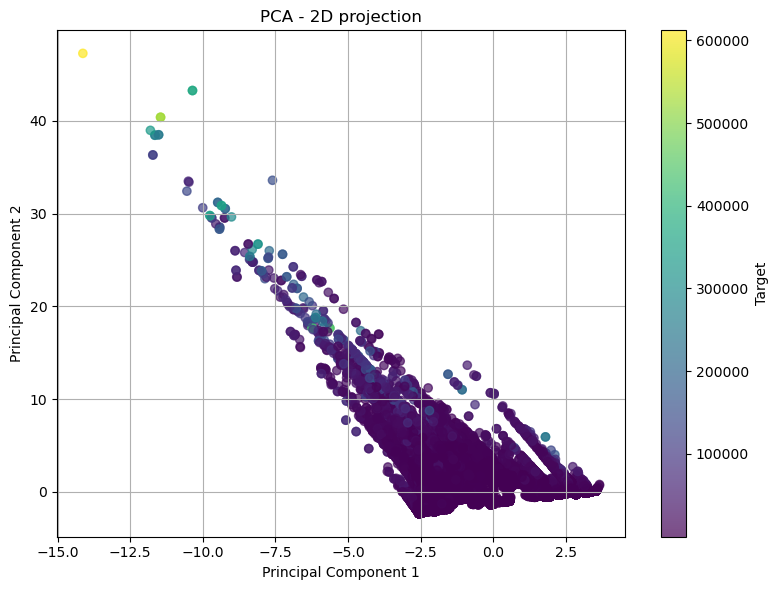

In [5]:
import matplotlib.pyplot as plt


def plot_pca_2d(X_pca, y, title="PCA - 2D projection"):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", alpha=0.7)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(title)
    plt.colorbar(scatter, label="Target")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_pca_2d(X_train_pca, y_train)

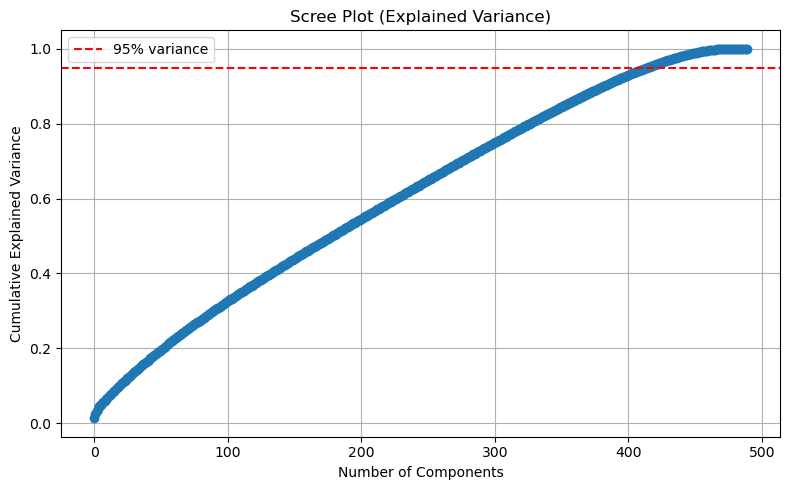

In [6]:
def plot_scree(X_scaled):
    pca = PCA()
    pca.fit(X_scaled)

    plt.figure(figsize=(8, 5))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
    plt.axhline(y=0.95, color="r", linestyle="--", label="95% variance")
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.title("Scree Plot (Explained Variance)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_scree(X_train_scaled)

### Linear Regression with PCA

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_pca, y_train)
lr.score(X_val_pca, y_val)

0.5740818619530562

### Ridge Regression with PCA

In [8]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=1.0)
rr.fit(X_train_pca, y_train)
rr.score(X_val_pca, y_val)

0.5740820195459229

### Decision Trees

In [9]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train_pca, y_train)
dt.score(X_val_pca, y_val)

0.634223930228229

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_pca, y_train)
rf.score(X_val_pca, y_val)

### XGBoost

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train_pca, y_train)
xgb.score(X_val_pca, y_val)

### SVR

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel="rbf")
svr.fit(X_train_pca, y_train)
svr.score(X_val_pca, y_val)

### MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
mlp.fit(X_train_pca, y_train)
mlp.score(X_val_pca, y_val)

### Evaluation / model comparison

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


def evaluate_models(X_train, y_train, X_val, y_val, X_test, y_test):
    models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=0.1),
        "DecisionTree": DecisionTreeRegressor(max_depth=5),
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
        "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
        "SVR": SVR(kernel="rbf"),
        "MLPRegressor": MLPRegressor(
            hidden_layer_sizes=(100,), max_iter=500, random_state=42
        ),
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)

        # Validation
        y_val_pred = model.predict(X_val)
        val_r2 = r2_score(y_val, y_val_pred)
        val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        val_mae = mean_absolute_error(y_val, y_val_pred)

        # Test
        y_test_pred = model.predict(X_test)
        test_r2 = r2_score(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_mae = mean_absolute_error(y_test, y_test_pred)

        results.append(
            {
                "Model": name,
                "Validation R²": val_r2,
                "Validation RMSE": val_rmse,
                "Validation MAE": val_mae,
                "Test R²": test_r2,
                "Test RMSE": test_rmse,
                "Test MAE": test_mae,
            }
        )

    df_results = pd.DataFrame(results)
    return df_results.sort_values(by="Test R²", ascending=False).round(3)


df_metrics = evaluate_models(X_train_pca, y_train, X_val_pca, y_val, X_test_pca, y_test)
display(df_metrics)

### 